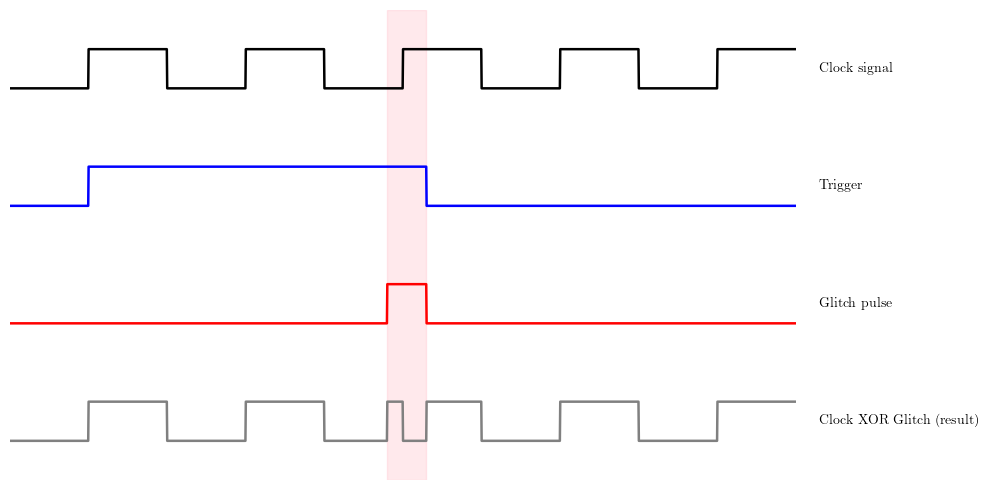

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "ytick.color" : "black",
    "xtick.color" : "black",
    "axes.labelcolor" : "black",
    "axes.edgecolor" : "black",
    "font.family" : "serif",
    "font.serif" : ["Computer Modern Serif"]
})
# Time base
t_end = 10
t = np.linspace(0, t_end, 2000)

# Parameters
clock_period = 2
glitch_time = 4.8
glitch_width = 0.5

# Signals
# Shift so clock starts low and ends low (make total time a multiple of the period)
num_periods = int(t_end // clock_period)
t_end_aligned = num_periods * clock_period
t = np.linspace(0, t_end_aligned, 2000)

clock = (((t + clock_period/2) % clock_period) < (clock_period / 2)).astype(float)
clock[-1] = 1

trigger = np.zeros_like(t)
trigger[(t > 1.0) & (t < (glitch_time + glitch_width))] = 1

glitch = np.zeros_like(t)
glitch[(t > glitch_time) & (t < glitch_time + glitch_width)] = 1

# XOR (clock ⊕ glitch)
clock_xor_glitch = np.logical_xor(clock > 0.5, glitch > 0.5).astype(float)

# Vertical offsets (nice spacing)
offsets = [9, 6, 3, 0]
labels = ["Clock signal", "Trigger", "Glitch pulse", "Clock XOR Glitch (result)"]
signals = [clock, trigger, glitch, clock_xor_glitch]
colors = ["black", "blue", "red", "gray"]

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

for yoff, sig, label, color in zip(offsets, signals, labels, colors):
    ax.plot(t, sig + yoff, color=color, linewidth=1.8)
    ax.text(t_end_aligned + 0.3, yoff + 0.5, label, fontsize=10, va="center")

ax.axvspan(glitch_time, glitch_time + glitch_width, color="pink", alpha=0.35)

ax.set_xlim(0, t_end_aligned)
ax.set_ylim(-1, 11)
ax.axis("off")
plt.tight_layout()
plt.savefig("clock-glitch-timing-general.pdf")